In [148]:
import torch
import torch.nn as nn
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt 

import pickle
import json

from rich import print as print

In [137]:
with open('data/batches/tensors-0.pkl', 'rb') as f:
    tensors, labels = pickle.load(f)

In [17]:
print(tensors[0:1,:,:,0:1].shape)
song = tensors[0:1,:,:,0:1].to(torch.float)

torch.Size([1, 256, 130, 1])


In [178]:
tensors.shape

torch.Size([1024, 256, 130, 4])

In [138]:
print(labels[0:1])

['8540_45']

In [61]:
cel_sum = nn.CrossEntropyLoss(reduction='sum')
cel_none = nn.CrossEntropyLoss(reduction='none')
cel_mean = nn.CrossEntropyLoss(reduction='mean')

In [125]:
def fix_losses(arr):
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            arr[i,j] = arr[i,j].cpu().numpy()[()]
    return np.array(arr)

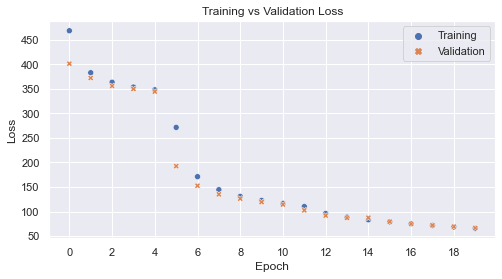

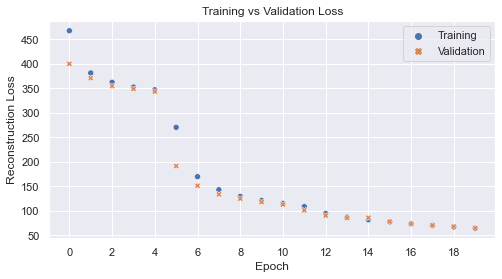

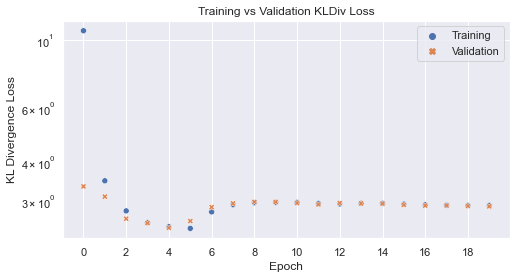

In [208]:
train_losses = np.load('out/MidiocrityVAE-train_losses.npy', allow_pickle=True)
valid_losses = np.load('out/MidiocrityVAE-valid_losses.npy', allow_pickle=True)
# train_losses = fix_losses(train_losses)
# sns.scatter(data=train_losses[:,0])
# sns.relplot(data=train_losses[:,1:])

kldiv_loss = {
    "Training": train_losses[:,0],
    "Validation": valid_losses[:,0],
}

recon_loss = {
    "Training": train_losses[:,1],
    "Validation": valid_losses[:,1],
}

loss = {
    "Training": train_losses[:,2],
    "Validation": valid_losses[:,2],
}

figsize = (8,4)

sns.set(rc={'figure.figsize':figsize})
g = sns.scatterplot(data=loss)
g.set(
    title="Training vs Validation Loss",
    xlabel="Epoch",
    xticks=range(0, 20, 2),
    ylabel="Loss",
#     yscale='log'
)
# plt.legend(title="", labels=["No C_0 Training", "W/ C_0 Training", "No C_0 Validation", "w/ C_0 Validation"])
plt.show(g)

sns.set(rc={'figure.figsize':figsize})
g = sns.scatterplot(data=recon_loss)
g.set(
    title="Training vs Validation Loss",
    xlabel="Epoch",
    xticks=range(0, 20, 2),
    ylabel="Reconstruction Loss",
#     yscale='log'
)
# plt.legend(title="", labels=["No C_0 Training", "W/ C_0 Training", "No C_0 Validation", "w/ C_0 Validation"])
plt.show(g)


sns.set(rc={'figure.figsize':figsize})
g = sns.scatterplot(data=kldiv_loss)
g.set(
    title="Training vs Validation KLDiv Loss",
    xlabel="Epoch",
    xticks=range(0, 20, 2),
    ylabel="KL Divergence Loss",
    yscale='log'
)
# plt.legend(title="", labels=["No C_0 Training", "W/ C_0 Training", "No C_0 Validation", "w/ C_0 Validation"])
plt.show(g)



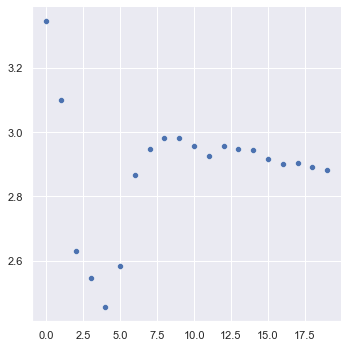

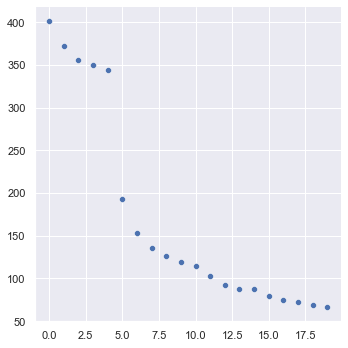

In [197]:

# train_losses = fix_losses(train_losses)
sns.relplot(data=train_losses[:,0])
sns.relplot(data=train_losses[:,2])

In [136]:
train_losses.shape

(1, 3)

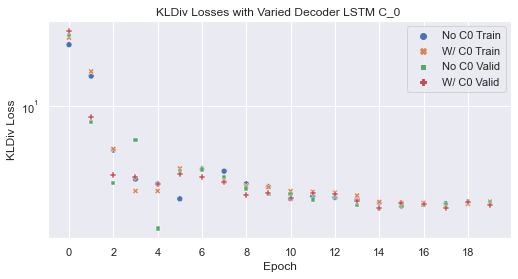

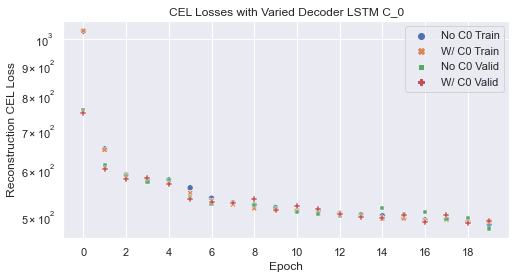

In [191]:
h0_train_losses = np.load('out/MidiocrityVAE-train_losses_w_h0.npy', allow_pickle=True)
c0_train_losses = np.load('out/MidiocrityVAE-train_losses_w_c0.npy', allow_pickle=True)
h0_valid_losses = np.load('out/MidiocrityVAE-valid_losses_w_h0.npy', allow_pickle=True)
c0_valid_losses = np.load('out/MidiocrityVAE-valid_losses_w_c0.npy', allow_pickle=True)

kldiv_loss = {
    "No C0 Train": h0_train_losses[:,0], 
    "W/ C0 Train": c0_train_losses[:,0],
    "No C0 Valid": h0_valid_losses[:,0],
    "W/ C0 Valid": c0_valid_losses[:,0]
}

recon_loss = {
    "No C0 Train": h0_train_losses[:,1], 
    "W/ C0 Train": c0_train_losses[:,1],
    "No C0 Valid": h0_valid_losses[:,1],
    "W/ C0 Valid": c0_valid_losses[:,1]
}

figsize = (8,4)

sns.set(rc={'figure.figsize':(8.3,4)})

# g = sns.relplot(data=[h0_train_losses[:,0], c0_train_losses[:,0], h0_valid_losses[:,0], c0_valid_losses[:,0]], legend=False) # , x="Epoch", y="Loss", legend=False)
g = sns.scatterplot(data=kldiv_loss)
g.set(
    title="KLDiv Losses with Varied Decoder LSTM C_0 ",
    xlabel="Epoch",
    xticks=range(0, 20, 2),
    ylabel="KLDiv Loss",
    yscale='log'
)
# plt.legend(title="", labels=["No C_0 Training", "W/ C_0 Training", "No C_0 Validation", "w/ C_0 Validation"])
plt.show(g)

sns.set(rc={'figure.figsize':figsize})

g = sns.scatterplot(data=recon_loss) # , x="Epoch", y="Loss", legend=False)
g.set(
    title="CEL Losses with Varied Decoder LSTM C_0",
    xlabel="Epoch",
    xticks=range(0, 20, 2),
    ylabel="Reconstruction CEL Loss",
    yscale='log'
)
# plt.legend(title="", labels=["No C_0 Training", "W/ C_0 Training", "No C_0 Validation", "w/ C_0 Validation"])
plt.show(g)
# sns.relplot(data=train_losses[:,1:])

In [177]:
torch.sum(torch.all(song == song, dim=2)).item()

256